In [77]:
import pandas as pd
import csv
import os
import yaml
import pyodbc
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', '.*only supports SQLAlchemy connectable.*')


## Get Postgres dB connection details

In [78]:
with open('E:\GitHub\creds.yaml', 'r') as file:
   creds = yaml.safe_load(file)

## Connect to dB and build the dataframe of sleep events

In [79]:
server = creds['sleepcon']['server']
database = creds['sleepcon']['database'] 
username = creds['sleepcon']['username'] 
password = creds['sleepcon']['password']
cnxn = pyodbc.connect(f'DRIVER={{PostgreSQL Unicode}};SERVER={server};DATABASE={database};UID={username};PWD={password}')
cursor = cnxn.cursor()
query = '''
SELECT * 
FROM events 
WHERE "Duration_sec" < 5000
'''
df = pd.read_sql(query, cnxn)
df.head(5)

,id,Session_Start,Usage_sec,Timestamp,Category,Duration_sec,id_pk
0,0,2022-08-30 18:23:00,26533,2022-08-30 23:03:00,Flow Limitation,8,1
1,1,2022-08-30 18:23:00,26533,2022-08-30 23:15:00,Obstructive Apnea,16,2
2,2,2022-08-30 18:23:00,26533,2022-08-30 23:23:00,Hypopnea,20,3
3,3,2022-08-30 18:23:00,26533,2022-08-30 23:24:00,Obstructive Apnea,14,4
4,4,2022-08-30 18:23:00,26533,2022-08-30 23:32:00,Obstructive Apnea,16,5


- **RERA**: RERA stands for "Respiratory Effort-Related Arousal." It is a type of event that occurs during sleep in which the person's respiratory effort (the effort required to breathe) increases significantly, leading to a brief arousal from sleep.

- **Hypopnea**: Hypopnea is a type of breathing disorder that occurs during sleep. It is characterized by a reduction in airflow during breathing that is greater than 50% and lasts for at least 10 seconds. Hypopnea can lead to fragmented sleep and can cause symptoms such as fatigue, daytime sleepiness, and difficulty concentrating.

- **Flow Limitation**: Flow limitation refers to a reduction in the airflow through the airways during breathing. It can be caused by various factors, including obstruction of the airways, increased resistance to airflow, or a combination of both. Flow limitation can lead to breathing disorders such as hypopnea and can have negative effects on sleep quality.

- **Obstructive Apnea**: Obstructive apnea is a type of sleep apnea that is caused by a physical obstruction of the airways. It is characterized by a complete cessation of airflow during breathing, which can lead to a lack of oxygen and an arousal from sleep.

- **Snore**: Snoring is a sound that is produced when the flow of air through the mouth and nose is partially blocked during sleep. It is often caused by a relaxation of the muscles in the throat and can be a sign of a breathing disorder such as sleep apnea. Snoring can disrupt sleep quality and can be a source of frustration for bed partners.


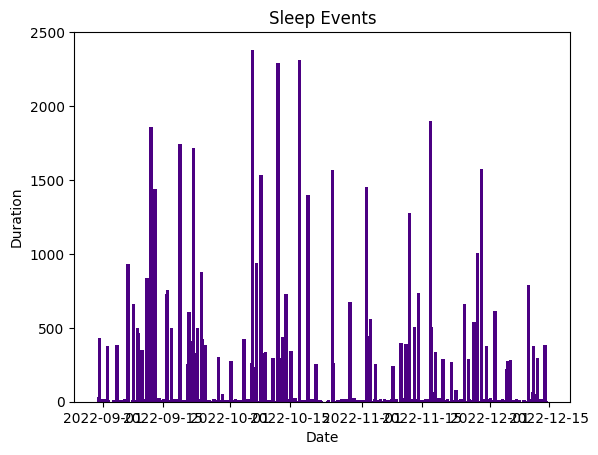

In [80]:
plt.bar(df.Timestamp, df.Duration_sec, color='indigo')
plt.title('Sleep Events')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.show()

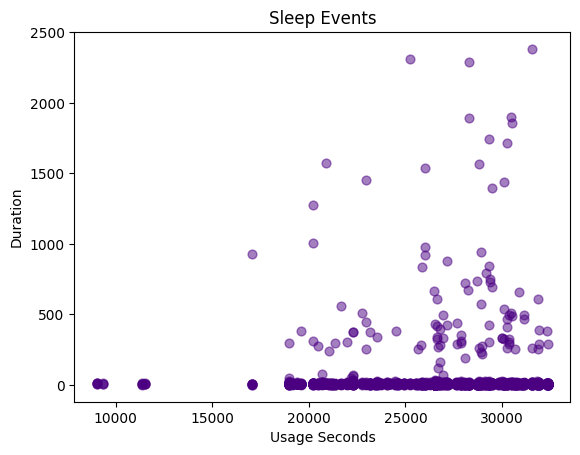

In [81]:
plt.scatter(df.Usage_sec, df.Duration_sec, c='indigo', s=40, alpha=0.50)
plt.title('Sleep Events')
plt.xlabel('Usage Seconds')
plt.ylabel('Duration')
plt.show()

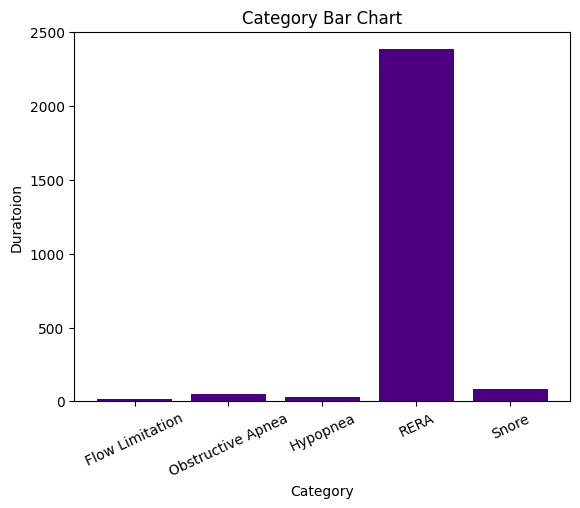

In [84]:
# Extract the Category column from the data frame
categories = df['Category']

# Create a bar chart
plt.bar(categories, df.Duration_sec, color ='indigo')

# Add a title and label the axes
plt.title('Category Bar Chart')
plt.xlabel('Category')
plt.xticks(rotation = 25)
plt.ylabel('Duratoion')


# Show the plot
plt.show()